<a href="https://colab.research.google.com/github/NiyazovIlia/Python-Data-Science/blob/lesson-4/course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real_Estate_Price_Prediction**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


real_estate_price_prediction = pd.read_csv('Real_Estate_Price_Prediction.csv')
real_estate_price_prediction.info()
#real_estate_price_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [77]:
real_max = pd.DataFrame(real_estate_price_prediction[{'Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Price'}].max(), dtype=np.int64).rename(columns={0:'real_max'})
real_min = pd.DataFrame(real_estate_price_prediction[{'Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Price'}].min(), dtype=np.int64).rename(columns={0:'real_min'})
real_mean = pd.DataFrame(real_estate_price_prediction[{'Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Price'}].mean(), dtype=np.int64).rename(columns={0:'real_mean'})
real_new = pd.concat([real_max, real_min, real_mean], axis=1)
real_new

,real_max,real_min,real_mean
Rooms,19,0,1
KitchenSquare,2014,0,6
Helthcare_2,6,0,1
Square,641,1,56
Floor,42,1,8
DistrictId,209,0,50
HouseYear,20052011,1910,3990
Ecology_1,0,0,0
Social_2,19083,168,5352
Shops_1,23,0,4


In [78]:
real_estate_price_prediction.value_counts()

Id     DistrictId  Rooms  Square      LifeSquare  KitchenSquare  Floor  HouseFloor  HouseYear  Ecology_1     Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  Price        
16798  22          1.0    39.956966   19.874715   8.0            2      17.0        1989       1.332153e-01  B          B          49        11395     3         1406.0        3            4        A        183467.407815    1
5579   90          2.0    52.512769   30.133454   8.0            16     17.0        1988       2.460315e-01  B          A          22        3151      4         2715.0        3            3        B        314948.199380    1
5569   118         4.0    100.243221  67.756645   8.0            4      9.0         1964       2.184397e-01  B          B          21        4472      6         1450.0        4            7        A        482603.543577    1
5570   140         1.0    39.702308   22.236080   8.0            10     12.0        2001       2.386171e-

In [79]:
real_null = pd.DataFrame(real_estate_price_prediction.isnull().sum())
real_null

,0
Id,0
DistrictId,0
Rooms,0
Square,0
LifeSquare,2113
KitchenSquare,0
Floor,0
HouseFloor,0
HouseYear,0
Ecology_1,0


Как мы видим из последних данных, есть пустые значения который будут мешать нам в дальнейшем, так же есть некорректность данных, к примеру максимальное значение размеров кухни 2014, такого не может быть.

**Построить график распределения целевой переменной. Сделать выводы.**

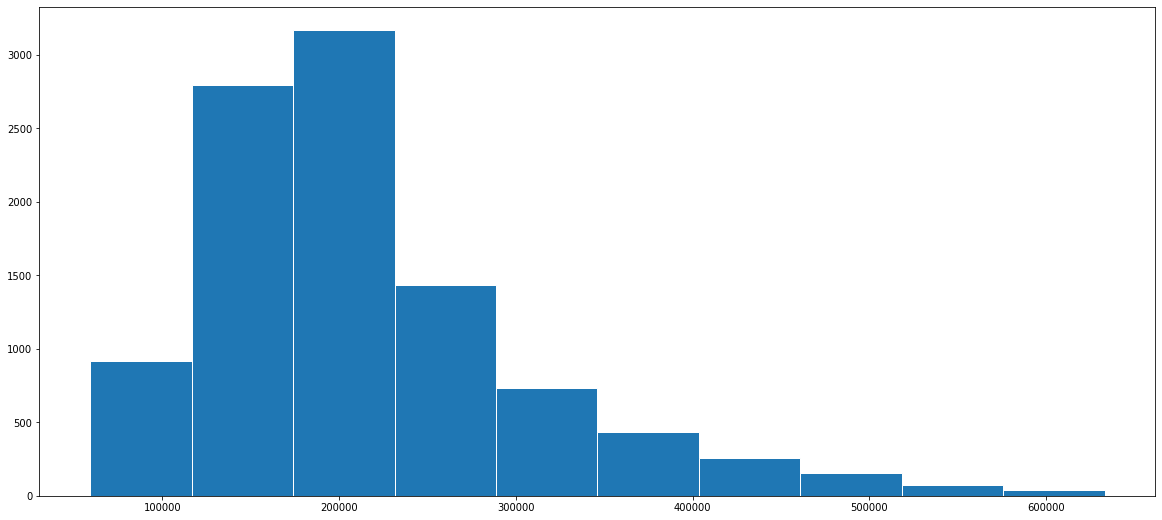

In [80]:
price = real_estate_price_prediction['Price']
plt.hist(price, ec="white")
plt.show()
#больше всего суммы приближенные к 200000

**Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.**

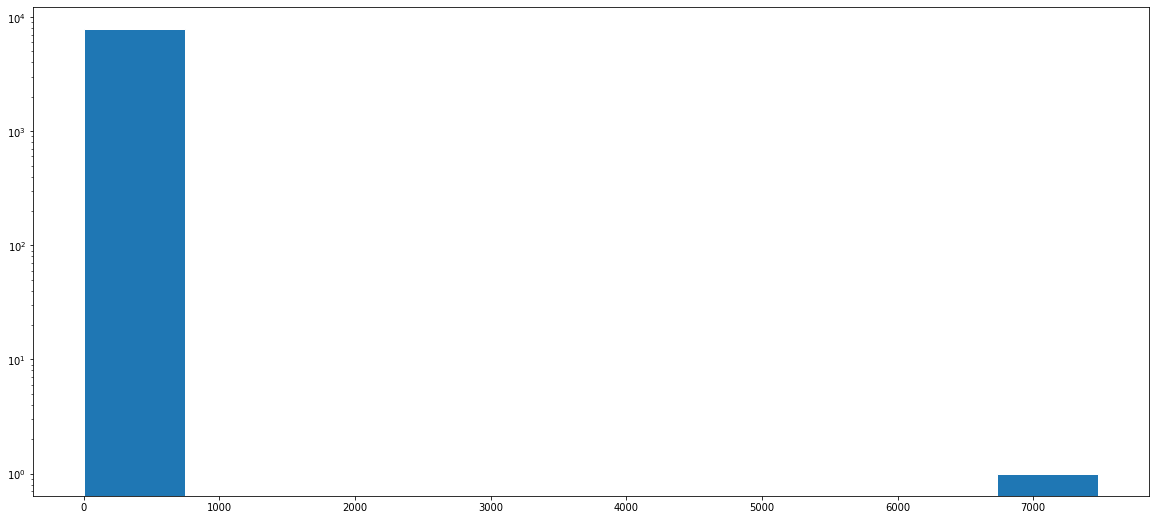

In [81]:
life = real_estate_price_prediction['LifeSquare']
plt.hist(life, ec="white")
plt.yscale(value='log')
plt.show()
#что-то тут не так, не понимаю почему такой график

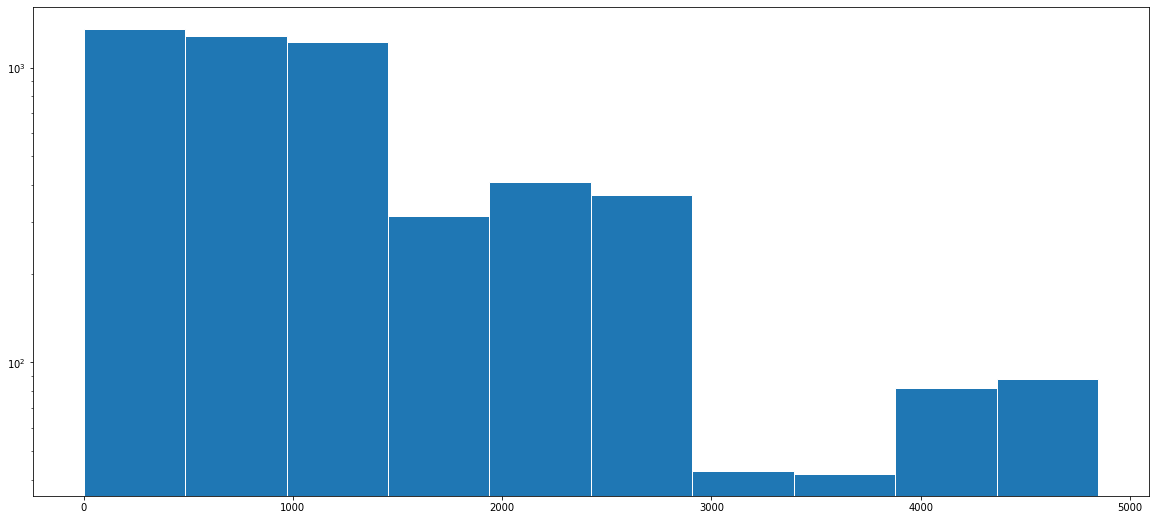

In [88]:
Healthcare_1 = real_estate_price_prediction['Healthcare_1']
plt.hist(Healthcare_1, ec="white")
plt.yscale(value='log')
plt.show()
# большая часть значений лежит от 0 до 1500